In [1]:
import pandas as pd
import numpy as np
from IPython.display import clear_output

In [2]:
class KNN:
    def __init__(self, n_neighbors : int = 3, pca : bool = True, n_components : int = 2):
        self.__n_neighbors = n_neighbors
        self.__pca = pca
        self.__n_components = n_components
        self.__fitted = False
        if self.__pca:
            print(f'KNeighborsClassifier (n_neighbors : {n_neighbors}, pca : {pca}, n_components : {n_components})')
        else:
            print(f'KNeighborsClassifier (n_neighbors : {n_neighbors}, pca : {pca}')
    
    
    def __distance(self,a, b):
        if a.shape != b.shape:
            raise Exception('Incorect data shape')
        return np.sqrt(np.sum(np.square(np.subtract(a, b))))
    
    
    def fit(self, X, y):
        if len(X) <= 0:
            raise Exception('Invalid X')
        elif len(y) <= 0:
            raise Exception('Invalid y')
        elif len(X) != len(y):
            raise Exception('X and y has different shapes')
        
        self.__X, self.__y = X, y
        self.__input_shape = self.__X[0].shape
        if self.__pca:
            self.__PCA = PCA(n_components=self.__n_components)
            self.__X = self.__PCA.fit_transform(self.__X)
    
        self.fitted = True
        print('Successfull fit')
    
    
    def predict(self, labels):
        if not self.fitted:
            raise Exception('The model is not fitted')
        if labels.shape[1:] != self.__input_shape:
                raise Exception('Invalide input shape')
        
        if self.__pca:
                labels = self.__PCA.transform(labels)
        result = []
        count = 0
        for label in labels:
            print(f'In process: {count / len(labels)}')
            print(f'Already done {count} / {len(labels)}')
            
            neighbors = [[self.__distance(label, self.__X[index]), self.__y[index]] for index in range(len(self.__X))]
            neighbors.sort(key = lambda x: x[0])
            neighbors = neighbors[:self.__n_components]
            values = [value[1] for value in neighbors]
            groups = [(values.count(group), group) for group in list(set(values))]
            groups.sort(key = lambda x:x[0], reverse=True)
            result.append(groups[0][1])
            
            count+=1
            clear_output(wait=True)
        
        return result

In [3]:
df= pd.read_csv('dataset.csv')
df

,Unnamed: 0,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7039,7039,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7040,7040,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0
7041,7041,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 16)

In [5]:
model = KNN()
model.fit(X_train, y_train)

KNeighborsClassifier (n_neighbors : 3, pca : True, n_components : 2)
Successfull fit


In [6]:
print(accuracy_score(model.predict(X_test), y_test))

0.709891150023663


Idk de ce aici imi da asa o precizie <br>
Fix acelasi cod intr-un alt notebook :( <br>
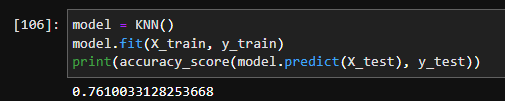